# Exploratory Data Analysis

1. Different types of data 

In [9]:
import pandas as pd

In [6]:
data = {
    'Age':[25,32,47,51],
    'Gender':['Male','Female','Female','Male'],
    'Income':[50000,60000,75000,82000],
    'is_married':[True,False,True,False]
}

In [7]:
df = pd.DataFrame(data)

In [8]:
df

,Age,Gender,Income,is_married
0,25,Male,50000,True
1,32,Female,60000,False
2,47,Female,75000,True
3,51,Male,82000,False


2. Bad and Missing data

In [10]:
import numpy as np

In [11]:
df.loc[2,'Gender'] = None                # Setting Missing Data

In [12]:
df

,Age,Gender,Income,is_married
0,25,Male,50000,True
1,32,Female,60000,False
2,47,None,75000,True
3,51,Male,82000,False


In [13]:
df.loc[1,'Income'] = -900                # Setting Missing Data

In [14]:
df

,Age,Gender,Income,is_married
0,25,Male,50000,True
1,32,Female,-900,False
2,47,None,75000,True
3,51,Male,82000,False


3. Data Cleaning 

In [16]:
df.isna().sum()                           # To check nan value

Age           0
Gender        1
Income        0
is_married    0
dtype: int64

In [18]:
df.fillna(df['Gender'].mode()[0], inplace=True)         # Find the most Frequancy and replace that

In [19]:
df                                                      # Rplace None with Male(More Frequant)

,Age,Gender,Income,is_married
0,25,Male,50000,True
1,32,Female,-900,False
2,47,Male,75000,True
3,51,Male,82000,False


In [20]:
df[df['Income']<=0]['Income']                          # Finding negative Income

1   -900
Name: Income, dtype: int64

In [22]:
df.loc[df["Income"]<=0,"Income"] = np.NaN              # assigning NaN to income having negative values

In [23]:
df

,Age,Gender,Income,is_married
0,25,Male,50000.0,True
1,32,Female,NaN,False
2,47,Male,75000.0,True
3,51,Male,82000.0,False


In [25]:
df.loc[df["Income"].isna(),"Gender"] = df["Gender"].mode()[0]  # if (Income = NaN) then set (Gender = Most Frequant Record)

In [26]:
df

,Age,Gender,Income,is_married
0,25,Male,50000.0,True
1,32,Male,NaN,False
2,47,Male,75000.0,True
3,51,Male,82000.0,False


In [28]:
df.fillna(df.Income.median(), inplace=True)                 # Replace NaN value with Central Income

In [29]:
df

,Age,Gender,Income,is_married
0,25,Male,50000.0,True
1,32,Male,75000.0,False
2,47,Male,75000.0,True
3,51,Male,82000.0,False


In [31]:
df["Gender"].replace("Male","Female",inplace = True)        # Using replace Method (String data)

In [32]:
df

,Age,Gender,Income,is_married
0,25,Female,50000.0,True
1,32,Female,75000.0,False
2,47,Female,75000.0,True
3,51,Female,82000.0,False


In [33]:
df["Age"].replace(25,52,inplace=True)                       # Using replace Method (Integer data)

In [34]:
df

,Age,Gender,Income,is_married
0,52,Female,50000.0,True
1,32,Female,75000.0,False
2,47,Female,75000.0,True
3,51,Female,82000.0,False


4. Detecting and handling the outliers

In [35]:
Q1 = df["Income"].quantile(0.25)

In [36]:
Q3 = df["Income"].quantile(0.75)

In [37]:
IQR = Q3 - Q1

In [38]:
lower_bound = Q1 - (1.5*IQR)

In [39]:
upper_bound = Q3 + (1.5*IQR)

In [40]:
outliers = df[(df["Income"]<lower_bound) | (df["Income"]>upper_bound)]

In [41]:
outliers

,Age,Gender,Income,is_married
0,52,Female,50000.0,True


Visulizing above code

In [42]:
import seaborn as sns

<Axes: xlabel='Income'>

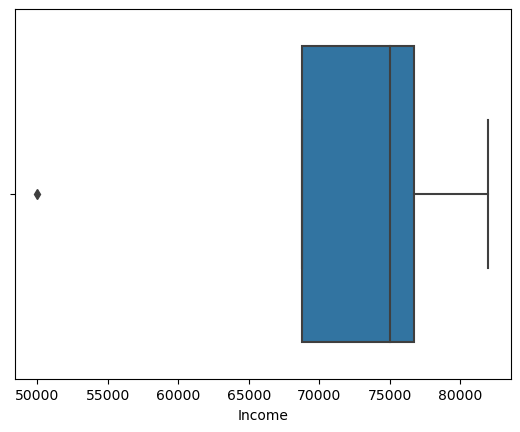

In [43]:
sns.boxplot(x=df["Income"])

Sum 1

In [44]:
np.mean([2,5,6,12,5.5,6.5])

6.166666666666667

In [45]:
# 25 Quartile
(25/100)*(5)

1.25

Sum 2

In [46]:
a = [12,15,20,21,25,28,30,33,36,40]

In [47]:
len(a)

10

In [48]:
# 25 Quartile
(25/100)*(11)

2.75

In [ ]:
"""
between 2-3 position
between 15 and 20
"""

In [49]:
15 + ((0.75) * (20-15))

18.75

Sum 3

In [50]:
# 75 Quartile
(75/100)*(11)

8.25

In [ ]:
"""
between 8-9 position
between 33 and 36
"""

In [51]:
33 + ((0.25)*(36-33))

33.75